# Handwritten math symbols 🔣 

Dataset consists of jpg files(45x45)

DISCLAIMER: dataset does not contain Hebrew alphabet at all. It includes basic Greek alphabet symbols like: alpha, beta, gamma, mu, sigma, phi and theta.

English alphanumeric symbols are included.

All math operators, set operators.

Basic pre-defined math functions like: log, lim, cos, sin, tan.

Math symbols like: \int, \sum, \sqrt, \delta and more.

detail more: https://www.kaggle.com/xainano/handwrittenmathsymbols

## Download dataset from kaggle

In [ ]:
from google.colab import files

# Upload file kaggle.json
files.upload()

In [2]:
# Download data 
!mkdir -p ~/.kaggle 
!cp kaggle.json ~/.kaggle/ 
!ls ~/.kaggle 
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d xainano/handwrittenmathsymbols

kaggle.json
100% 342M/343M [00:02<00:00, 168MB/s]
100% 343M/343M [00:02<00:00, 165MB/s]


In [ ]:
!unzip /content/handwrittenmathsymbols.zip

In [ ]:
!unrar x /content/data.rar

## Visualize data

In [5]:
# Walk through data 
import os

for dirpath, dirnames, filenames in os.walk("/content/extracted_images"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 82 directories and 0 images in '/content/extracted_images'.
There are 0 directories and 199 images in '/content/extracted_images/forward_slash'.
There are 0 directories and 2742 images in '/content/extracted_images/int'.
There are 0 directories and 9340 images in '/content/extracted_images/y'.
There are 0 directories and 973 images in '/content/extracted_images/leq'.
There are 0 directories and 8908 images in '/content/extracted_images/sqrt'.
There are 0 directories and 409 images in '/content/extracted_images/gamma'.
There are 0 directories and 3545 images in '/content/extracted_images/5'.
There are 0 directories and 201 images in '/content/extracted_images/sigma'.
There are 0 directories and 1783 images in '/content/extracted_images/infty'.
There are 0 directories and 25112 images in '/content/extracted_images/+'.
There are 0 directories and 3118 images in '/content/extracted_images/6'.
There are 0 directories and 609 images in '/content/extracted_images/ldots'.
There are 0

In [6]:
!wget https://raw.githubusercontent.com/ThomasLech/CROHME_extractor/master/classes.txt

--2022-02-08 07:03:30--  https://raw.githubusercontent.com/ThomasLech/CROHME_extractor/master/classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104 [text/plain]
Saving to: ‘classes.txt’

classes.txt         100%[===================>]     104  --.-KB/s    in 0s      

2022-02-08 07:03:30 (6.53 MB/s) - ‘classes.txt’ saved [104/104]



In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
import random
from skimage.feature import hog
import matplotlib.image as mpimg
import tensorflow as tf
import keras

In [8]:
classes = open('/content/classes.txt', 'r').read().split()
classes = ['+','-','div','times','=','infty','int','sqrt','log','sum']
len(classes)

10

In [9]:
def view_random_image(target_dir, target_class):
    # set up target directory
    target_folder = target_dir + target_class

    # Get a random image class 
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot  it using matplotlib
    img = mpimg.imread(target_folder +'/'+ random_image[0])
    plt.imshow(img, cmap= 'gray')
    plt.title(target_class)
    plt.axis(False)

    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img


Image shape: (45, 45)


array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

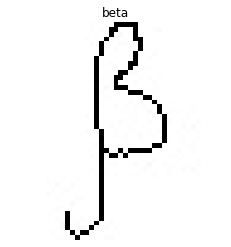

In [25]:
view_random_image('/content/extracted_images/', 'beta')

## Split data into train and test set

In [19]:
from numpy.lib.utils import source
import shutil

rootdir = '/content/extracted_images'

for i in classes:
    os.makedirs(rootdir + '/train/' + i)
    os.makedirs(rootdir + '/test/' + i)
    source = rootdir +'/' + i

    allFileNames = os.listdir(source)
    np.random.shuffle(allFileNames)

    train_size = 0.75
    train_FileNames, test_FileNames = np.split(np.array(allFileNames), [int(len(allFileNames) * train_size)])

    train_FileNames = [source + '/' + name for name in train_FileNames.tolist()]
    test_FileNames = [source + '/' + name for name in test_FileNames.tolist()]

    for name in train_FileNames:
      shutil.copy(name, rootdir + '/train/' + i)

    for name in test_FileNames:
      shutil.copy(name, rootdir + '/test/' + i)


## Pre-processing data

In [20]:
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [62]:
train_dir = "/content/extracted_images/train"
test_dir = "/content/extracted_images/test"



# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale= 1./255)
test_datagen = ImageDataGenerator(rescale= 1./255)

# Load data in from directories and turn it into batches
train_ds = train_datagen.flow_from_directory(train_dir,
                                            target_size = (45, 45),
                                            batch_size = 32,
                                            color_mode= 'rgb',
                                            class_mode = 'categorical')

test_ds = test_datagen.flow_from_directory(test_dir,
                                          target_size = (45, 45),
                                          batch_size = 32,
                                          color_mode= 'rgb',
                                          class_mode = 'categorical')

Found 70838 images belonging to 10 classes.
Found 23617 images belonging to 10 classes.


## Create model

In [64]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, activation= 'relu', input_shape = (45, 45, 3)),
    tf.keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_41 (Conv2D)          (None, 43, 43, 16)        448       
                                                                 
 conv2d_42 (Conv2D)          (None, 43, 43, 16)        2320      
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 21, 21, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 10, 10, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 10, 10, 64)      

In [65]:
# Compile model 
model.compile(
    loss = tf.keras.losses.categorical_crossentropy,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [66]:
# Fit model 
history = model.fit(train_ds, epochs = 10,
                    steps_per_epoch = len(train_ds),
                    validation_data = test_ds,
                    validation_steps = len(test_ds))

Epoch 1/10
2214/2214 [==============================] - 36s 16ms/step - loss: 0.0757 - accuracy: 0.9787 - val_loss: 0.0171 - val_accuracy: 0.9969
Epoch 2/10
2214/2214 [==============================] - 39s 18ms/step - loss: 0.0174 - accuracy: 0.9958 - val_loss: 0.0250 - val_accuracy: 0.9943
Epoch 3/10
2214/2214 [==============================] - 40s 18ms/step - loss: 0.0122 - accuracy: 0.9971 - val_loss: 0.0121 - val_accuracy: 0.9979
Epoch 4/10
2214/2214 [==============================] - 59s 27ms/step - loss: 0.0095 - accuracy: 0.9979 - val_loss: 0.0164 - val_accuracy: 0.9966
Epoch 5/10
2214/2214 [==============================] - 34s 15ms/step - loss: 0.0101 - accuracy: 0.9978 - val_loss: 0.0093 - val_accuracy: 0.9970
Epoch 6/10
2214/2214 [==============================] - 32s 14ms/step - loss: 0.0077 - accuracy: 0.9984 - val_loss: 0.0107 - val_accuracy: 0.9986
Epoch 7/10
2214/2214 [==============================] - 32s 15ms/step - loss: 0.0071 - accuracy: 0.9985 - val_loss: 0.0107 -

## Evaluate model

In [53]:
model.evaluate(test_ds)

739/739 [==============================] - 8s 10ms/step - loss: 0.0060 - accuracy: 0.9986


[0.0059579648077487946, 0.9986026883125305]

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

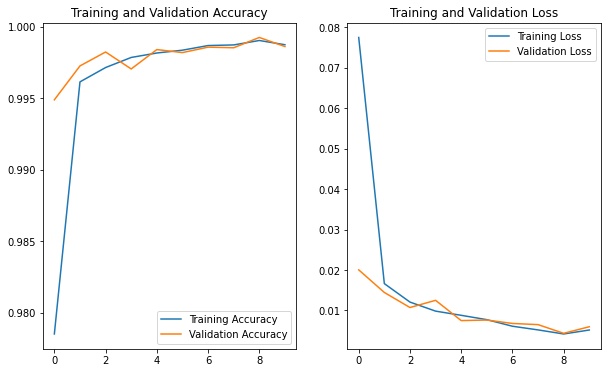

In [50]:
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Making prediction our model

In [51]:
# Sort class name 
import pathlib

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))

In [88]:
class_names

array(['+', '-', '=', 'div', 'infty', 'int', 'log', 'sqrt', 'sum',
       'times'], dtype='<U5')

In [71]:
def load_pre_image(filename, shape):

    # Read file from directory
    img = tf.io.read_file(filename)

    # Decode the img into 3-chanels and tensor
    img = tf.image.decode_image(img, channels = 3)
    
    # Resize the image 
    img = tf.image.resize(img, size = (shape, shape))

    img = img/255.

    return img


In [84]:
def plot_and_pred_class(model, filename, class_name):
    # import image
    img = load_pre_image(filename, 45)

    # Get value model predict
    prob_pred =  model.predict(tf.expand_dims(img, axis = 0))
    class_pred = class_names[np.argmax(prob_pred)]

    # show plot
    plt.imshow(img)
    plt.title(f'Prediction: {class_pred}: {round(np.amax(prob_pred)*100, 3)}%')
    plt.axis(False)

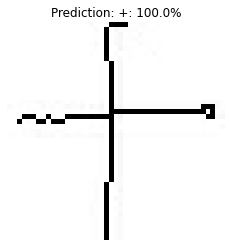

In [87]:
plot_and_pred_class(model, filename = '/content/extracted_images/+/+_12299.jpg', class_name= '+')

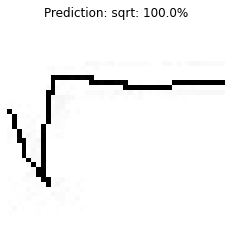

In [89]:
plot_and_pred_class(model, filename = '/content/extracted_images/sqrt/exp100214.jpg', class_name = 'sqrt')

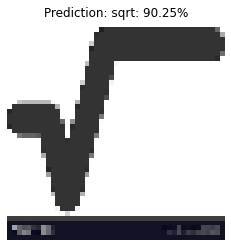

In [91]:
plot_and_pred_class(model, filename = '/content/images.png', class_name= 'sqrt')